#  Implement Batch Gradient Desecent with Early Stopping for Softmax Regression

In [445]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
import matplotlib.pyplot as plt
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [446]:
print(iris['feature_names'])
print(iris['data'].shape)
print(iris['target_names'])
print(iris['target'].shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
['setosa' 'versicolor' 'virginica']
(150,)


In [447]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 4 features, 3 Classes, 150 instances

In [515]:
X = iris['data']
y = iris['target']

In [516]:
X_bias = np.c_[np.ones([len(X), 1]), X]
X_, X_test, y_, y_test = train_test_split(X_bias, y, test_size = 0.2, random_state = 6)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size = 0.2, random_state = 6)

In [517]:
num_feat = X_train.shape[1]
num_classes = len(iris['target_names'])
num_instances = len(X_train)

In [518]:
epochs = 5000
eta = 0.05
epochs_stop = 175    # stop if validation error has not change after this many epochs

#Theta = np.random.rand(num_feat, num_classes)
Theta = np.zeros((num_feat, num_classes))
gradient = np.zeros((num_feat, num_classes))
val_error = []
minimum_val_error = float("inf")
loss_vec = np.zeros(epochs)
for epoch in range(epochs):
    loss = 0
    for k in range(num_classes):            # Too slow, vectorize this loop
        gradient_vec = np.zeros((num_feat, num_instances))
        for m in range(num_instances):     # Too slow, vectorize this loop
            x = X_train[m:m+1]
            y_k = 0
            if y_train[m] == k:
                y_k = 1                
            Sk = x.dot(Theta)
            p_hat_k = np.exp(Sk[0, k])/np.sum(np.exp(Sk))                                    
            gradient_vec[:,m:m+1] = 1/num_instances * (p_hat_k - y_k)*x.T
            
        gradient[:, k] = gradient_vec.sum(axis=1) 
        loss += -1/num_instances * y_k*np.log(p_hat_k)        # cross entropy cost function
    Theta = Theta - eta*gradient
    loss_vec[epoch] = loss
    
    y_val_predict = np.argmax(X_val.dot(Theta), axis=1)    
    val_error.append(mean_squared_error(y_val, y_val_predict))
    if val_error[epoch]<minimum_val_error:
        minimum_val_error = val_error[epoch]
        best_epoch = epoch
        best_model = Theta
    
    if epoch > epochs_stop:
        if np.sum(np.abs(np.diff(val_error[epoch-epochs_stop:epoch]))) < np.finfo(float).eps:
            break        
                
print(epoch)

259


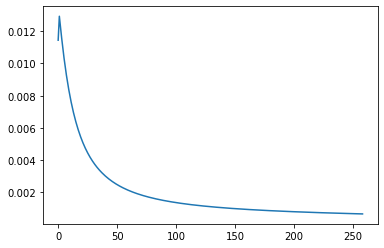

In [519]:
plt.plot(loss_vec[:epoch])

In [520]:
Theta

array([[ 0.19802069,  0.11875115, -0.31677183],
       [ 0.38199616,  0.22614035, -0.60813651],
       [ 0.91544495, -0.24618639, -0.66925857],
       [-1.34916758,  0.13742861,  1.21173897],
       [-0.63026817, -0.21471012,  0.84497829]])

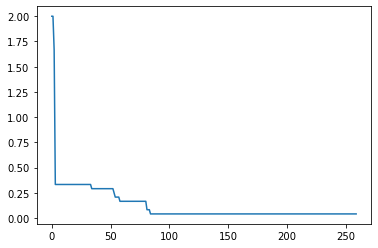

In [521]:
plt.plot(val_error[0:])

In [524]:
    y_predict = np.argmax(X_test.dot(Theta), axis=1)    
    print(mean_squared_error(y_test, y_predict))
    print(y_test)
    print(y_predict)
    print('Accuracy Score', np.mean(y_predict==y_test))

0.03333333333333333
[0 2 0 0 2 1 2 0 2 1 2 1 2 2 1 2 2 1 1 0 0 2 0 0 1 1 1 2 0 1]
[0 2 0 0 2 1 2 0 2 1 2 1 2 2 1 2 2 1 1 0 0 2 0 0 1 2 1 2 0 1]
Accuracy Score 0.9666666666666667
